# Exploratory Data Analysis: Duolingo Forgetting Curve

**Author:** Yuling Song  
**Branch:** yuling/eda_modeling  
**Purpose:** Exploratory Data Analysis of Duolingo Spaced Repetition Dataset  
**Dataset:** cleaned_data/duolingo_all_languages.csv

## Research Question
Does the relationship between delta (time since last review) and p_recall (probability of recall) differ by learning language?


## 1. Library Imports and Dataset Loading

Import necessary libraries and load the cleaned dataset.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('../cleaned_data/duolingo_all_languages.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (12854226, 5)

First few rows:


,p_recall,delta,learning_language,history_seen,history_correct
0,1.0,27649635,de,6,4
1,0.5,27649635,de,4,4
2,1.0,27649635,de,5,4
3,0.5,27649635,de,6,5
4,1.0,27649635,de,4,4


## 2. Data Quality Checks

Check for missing values, data types, and logical validation of key variables.


In [4]:
# Basic information about the dataset
print("=== Dataset Info ===")
print(df.info())
print("\n=== Missing Values ===")
print(df.isnull().sum())
print("\n=== Data Types ===")
print(df.dtypes)


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854226 entries, 0 to 12854225
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   p_recall           float64
 1   delta              int64  
 2   learning_language  object 
 3   history_seen       int64  
 4   history_correct    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 490.3+ MB
None

=== Missing Values ===
p_recall             0
delta                0
learning_language    0
history_seen         0
history_correct      0
dtype: int64

=== Data Types ===
p_recall             float64
delta                  int64
learning_language     object
history_seen           int64
history_correct        int64
dtype: object


In [5]:
# Statistical summary of key variables
print("=== Statistical Summary ===")
print(df[['p_recall', 'delta', 'history_seen', 'history_correct']].describe())


=== Statistical Summary ===
           p_recall         delta  history_seen  history_correct
count  1.285423e+07  1.285423e+07  1.285423e+07     1.285423e+07
mean   8.961056e-01  7.295811e+05  2.198109e+01     1.935025e+01
std    2.714048e-01  2.246499e+06  1.295508e+02     1.119681e+02
min    0.000000e+00  1.000000e+00  1.000000e+00     1.000000e+00
25%    1.000000e+00  5.320000e+02  3.000000e+00     3.000000e+00
50%    1.000000e+00  7.713400e+04  6.000000e+00     6.000000e+00
75%    1.000000e+00  4.425070e+05  1.500000e+01     1.300000e+01
max    1.000000e+00  4.032836e+07  1.351800e+04     1.288800e+04


In [6]:
# Logical validation checks
print("=== Logical Validation ===")
print(f"p_recall range: [{df['p_recall'].min():.3f}, {df['p_recall'].max():.3f}]")
print(f"Expected range: [0, 1]")
print(f"\ndelta range: [{df['delta'].min():.0f}, {df['delta'].max():.0f}]")
print(f"Negative delta values: {(df['delta'] < 0).sum()}")
print(f"\nhistory_seen range: [{df['history_seen'].min():.0f}, {df['history_seen'].max():.0f}]")
print(f"Negative history_seen values: {(df['history_seen'] < 0).sum()}")
print(f"\nhistory_correct range: [{df['history_correct'].min():.0f}, {df['history_correct'].max():.0f}]")
print(f"history_correct > history_seen: {(df['history_correct'] > df['history_seen']).sum()}")
print(f"\nUnique languages: {df['learning_language'].nunique()}")
print(f"Languages: {df['learning_language'].unique()}")


=== Logical Validation ===
p_recall range: [0.000, 1.000]
Expected range: [0, 1]

delta range: [1, 40328362]
Negative delta values: 0

history_seen range: [1, 13518]
Negative history_seen values: 0

history_correct range: [1, 12888]
history_correct > history_seen: 0

Unique languages: 6
Languages: ['de' 'es' 'pt' 'en' 'fr' 'it']


## 3. Variable Distribution Visualizations

Explore the distributions of key variables to understand the data structure.


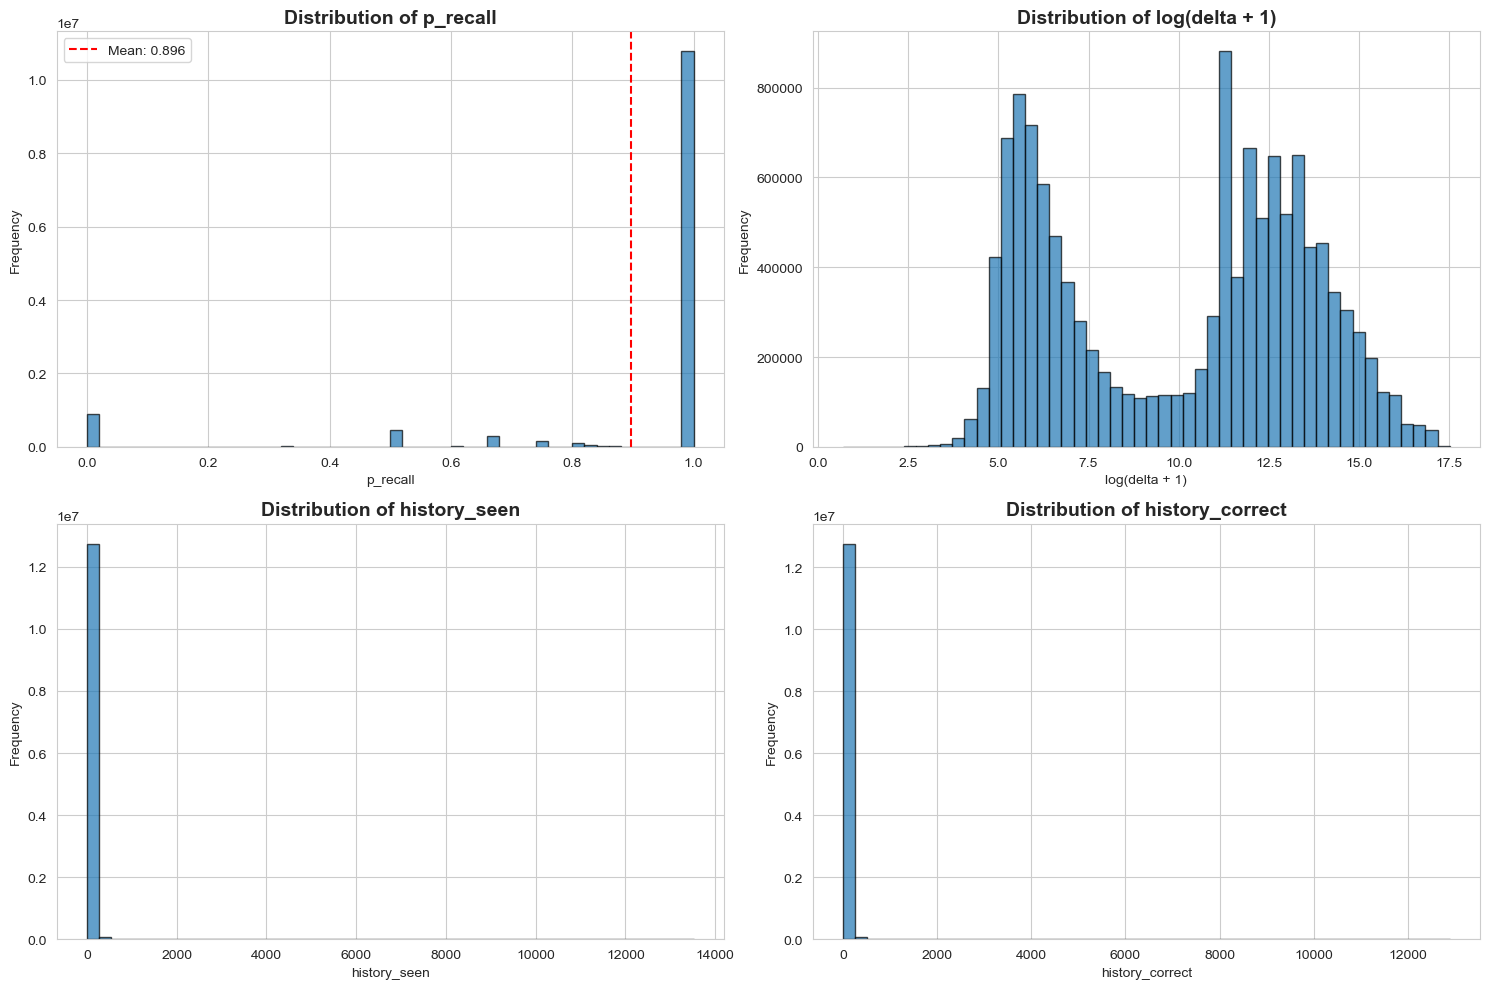

In [7]:
# Distribution of p_recall
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# p_recall distribution
axes[0, 0].hist(df['p_recall'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of p_recall', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('p_recall')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['p_recall'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df["p_recall"].mean():.3f}')
axes[0, 0].legend()

# delta distribution (log scale for better visualization)
df['log_delta'] = np.log1p(df['delta'])  # log1p to handle zeros
axes[0, 1].hist(df['log_delta'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of log(delta + 1)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('log(delta + 1)')
axes[0, 1].set_ylabel('Frequency')

# history_seen distribution
axes[1, 0].hist(df['history_seen'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of history_seen', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('history_seen')
axes[1, 0].set_ylabel('Frequency')

# history_correct distribution
axes[1, 1].hist(df['history_correct'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of history_correct', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('history_correct')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


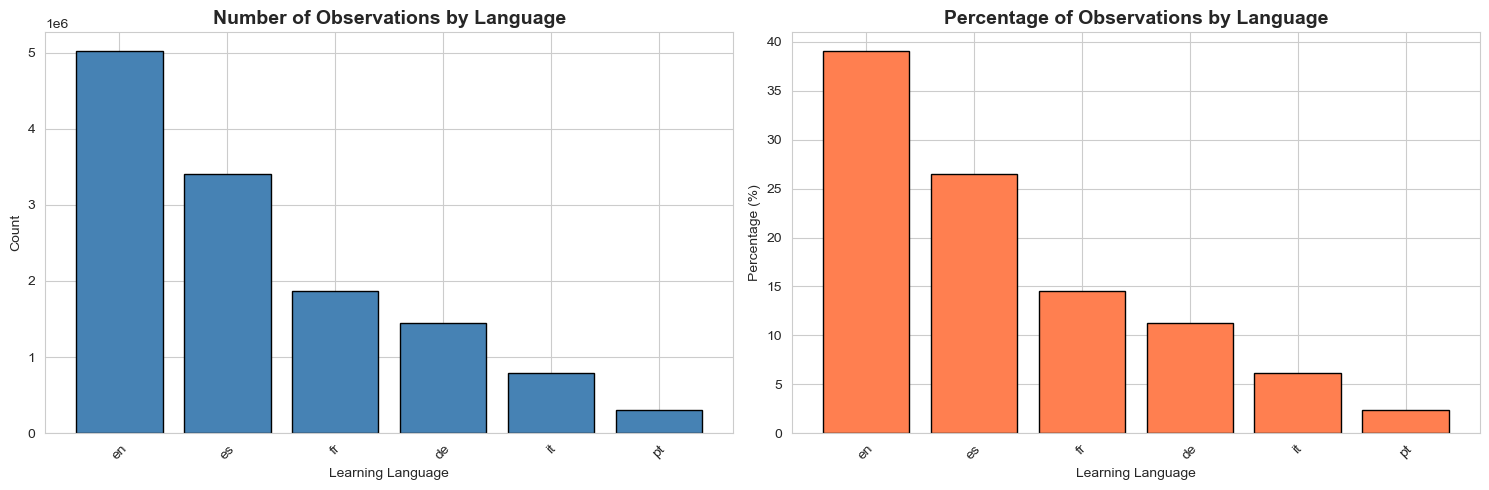


=== Language Distribution ===
learning_language
en    5014791
es    3407689
fr    1873734
de    1452597
it     793935
pt     311480
Name: count, dtype: int64


In [8]:
# Language distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count by language
lang_counts = df['learning_language'].value_counts()
axes[0].bar(lang_counts.index, lang_counts.values, color='steelblue', edgecolor='black')
axes[0].set_title('Number of Observations by Language', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Learning Language')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Percentage by language
lang_pct = df['learning_language'].value_counts(normalize=True) * 100
axes[1].bar(lang_pct.index, lang_pct.values, color='coral', edgecolor='black')
axes[1].set_title('Percentage of Observations by Language', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Learning Language')
axes[1].set_ylabel('Percentage (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n=== Language Distribution ===")
print(lang_counts)


## 4. Relationship Plots

Explore relationships between p_recall and key predictor variables.


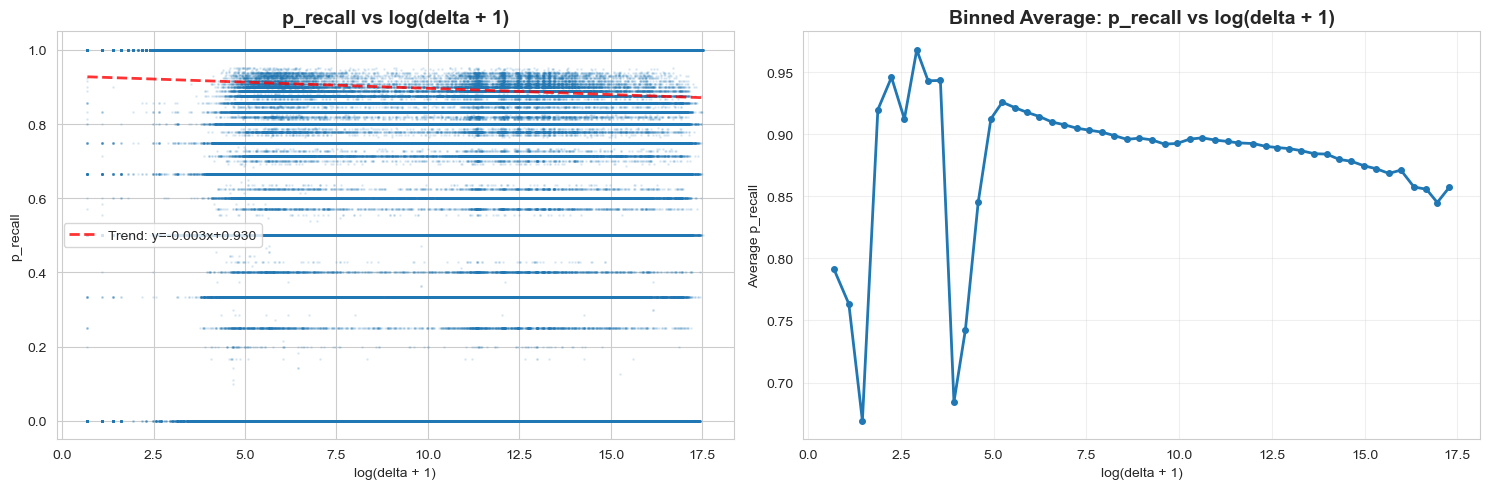

In [9]:
# p_recall vs log(delta)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot with density
axes[0].scatter(df['log_delta'], df['p_recall'], alpha=0.1, s=1)
axes[0].set_title('p_recall vs log(delta + 1)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('log(delta + 1)')
axes[0].set_ylabel('p_recall')

# Add trend line
z = np.polyfit(df['log_delta'], df['p_recall'], 1)
p = np.poly1d(z)
axes[0].plot(df['log_delta'].sort_values(), p(df['log_delta'].sort_values()), 
             "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.3f}x+{z[1]:.3f}')
axes[0].legend()

# Binned average for clearer pattern
df['log_delta_binned'] = pd.cut(df['log_delta'], bins=50)
binned_avg = df.groupby('log_delta_binned', observed=True).agg({
    'p_recall': 'mean',
    'log_delta': 'mean'
}).reset_index()
axes[1].plot(binned_avg['log_delta'], binned_avg['p_recall'], 
             marker='o', linewidth=2, markersize=4)
axes[1].set_title('Binned Average: p_recall vs log(delta + 1)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('log(delta + 1)')
axes[1].set_ylabel('Average p_recall')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


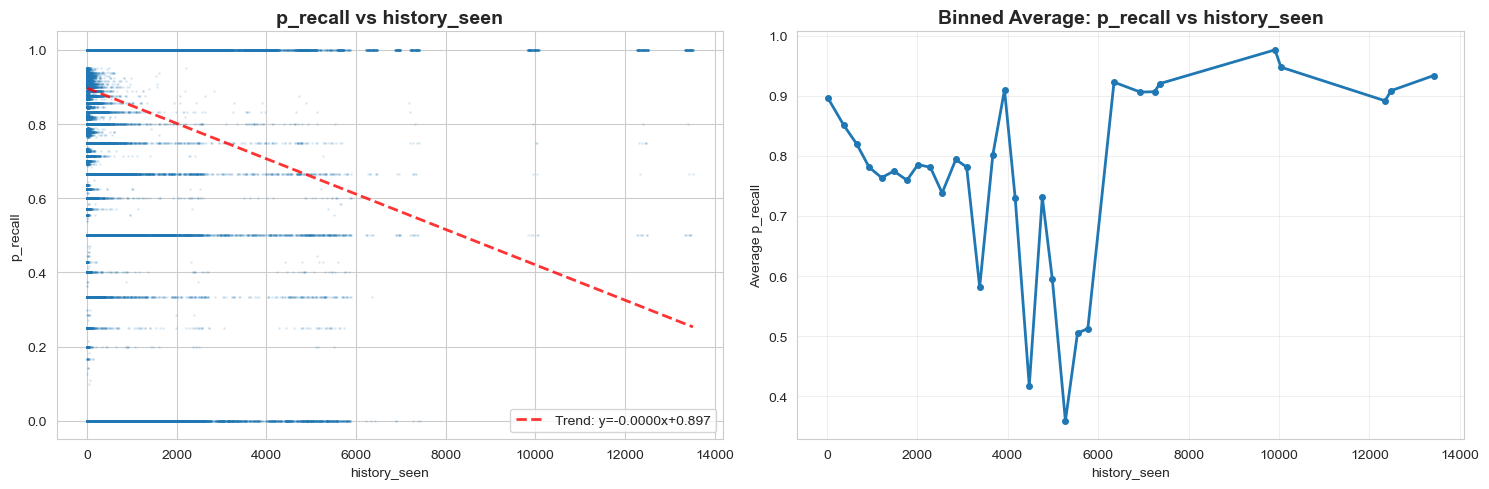

In [10]:
# p_recall vs history_seen
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(df['history_seen'], df['p_recall'], alpha=0.1, s=1)
axes[0].set_title('p_recall vs history_seen', fontsize=14, fontweight='bold')
axes[0].set_xlabel('history_seen')
axes[0].set_ylabel('p_recall')

# Add trend line
z = np.polyfit(df['history_seen'], df['p_recall'], 1)
p = np.poly1d(z)
axes[0].plot(df['history_seen'].sort_values(), p(df['history_seen'].sort_values()), 
             "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.4f}x+{z[1]:.3f}')
axes[0].legend()

# Binned average
df['history_seen_binned'] = pd.cut(df['history_seen'], bins=50)
binned_avg = df.groupby('history_seen_binned', observed=True).agg({
    'p_recall': 'mean',
    'history_seen': 'mean'
}).reset_index()
axes[1].plot(binned_avg['history_seen'], binned_avg['p_recall'], 
             marker='o', linewidth=2, markersize=4)
axes[1].set_title('Binned Average: p_recall vs history_seen', fontsize=14, fontweight='bold')
axes[1].set_xlabel('history_seen')
axes[1].set_ylabel('Average p_recall')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


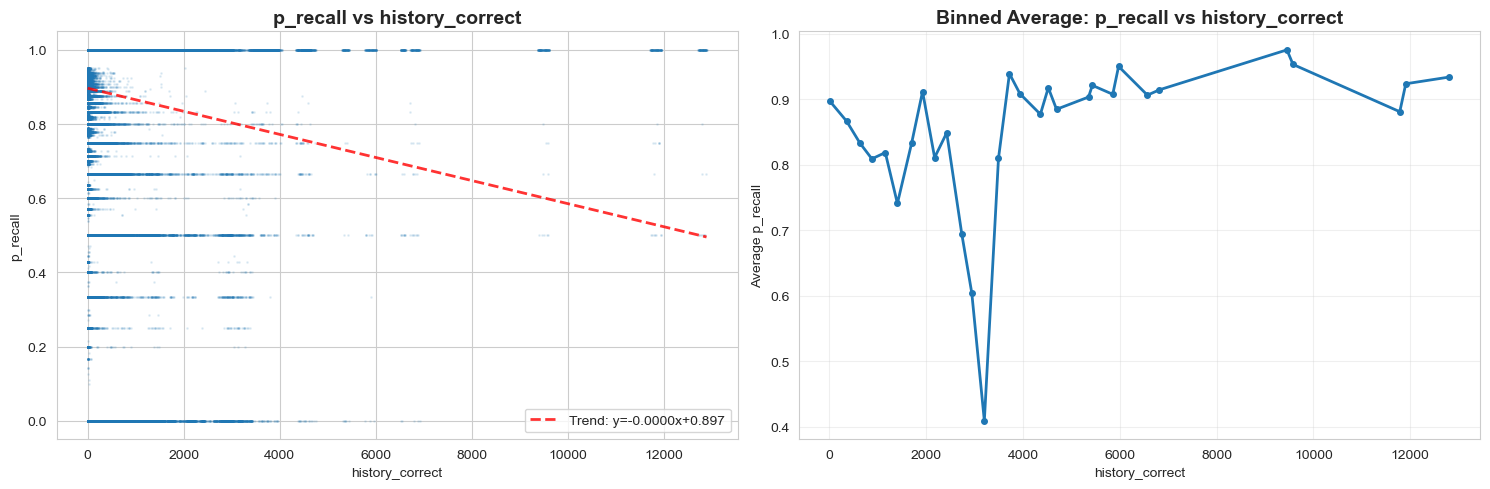

In [11]:
# p_recall vs history_correct
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(df['history_correct'], df['p_recall'], alpha=0.1, s=1)
axes[0].set_title('p_recall vs history_correct', fontsize=14, fontweight='bold')
axes[0].set_xlabel('history_correct')
axes[0].set_ylabel('p_recall')

# Add trend line
z = np.polyfit(df['history_correct'], df['p_recall'], 1)
p = np.poly1d(z)
axes[0].plot(df['history_correct'].sort_values(), p(df['history_correct'].sort_values()), 
             "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.4f}x+{z[1]:.3f}')
axes[0].legend()

# Binned average
df['history_correct_binned'] = pd.cut(df['history_correct'], bins=50)
binned_avg = df.groupby('history_correct_binned', observed=True).agg({
    'p_recall': 'mean',
    'history_correct': 'mean'
}).reset_index()
axes[1].plot(binned_avg['history_correct'], binned_avg['p_recall'], 
             marker='o', linewidth=2, markersize=4)
axes[1].set_title('Binned Average: p_recall vs history_correct', fontsize=14, fontweight='bold')
axes[1].set_xlabel('history_correct')
axes[1].set_ylabel('Average p_recall')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Cross-Language Comparisons

Compare forgetting curves and average recall rates across different learning languages.


In [12]:
# Average p_recall by language
lang_stats = df.groupby('learning_language').agg({
    'p_recall': ['mean', 'std', 'count'],
    'delta': ['mean', 'median'],
    'history_seen': 'mean',
    'history_correct': 'mean'
}).round(3)

print("=== Summary Statistics by Language ===")
print(lang_stats)


=== Summary Statistics by Language ===
                  p_recall                       delta          history_seen  \
                      mean    std    count        mean   median         mean   
learning_language                                                              
de                   0.893  0.280  1452597  956926.443  93130.0       11.963   
en                   0.898  0.268  5014791  657203.061  42284.0       34.311   
es                   0.898  0.269  3407689  865532.303  95477.0       13.067   
fr                   0.883  0.284  1873734  706341.253  77954.0       19.455   
it                   0.909  0.258   793935  330383.482  38406.0       10.229   
pt                   0.906  0.264   311480  504596.902  63152.0       12.860   

                  history_correct  
                             mean  
learning_language                  
de                         10.813  
en                         29.832  
es                         11.720  
fr                      

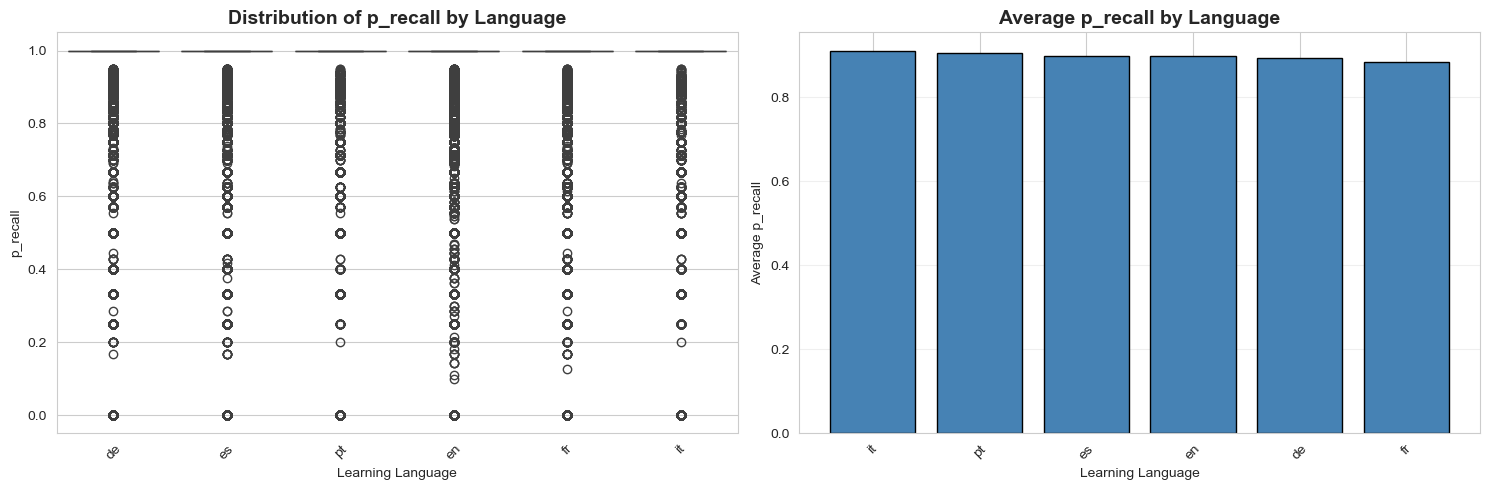

In [13]:
# Box plot: p_recall by language
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot
sns.boxplot(data=df, x='learning_language', y='p_recall', ax=axes[0])
axes[0].set_title('Distribution of p_recall by Language', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Learning Language')
axes[0].set_ylabel('p_recall')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot: average p_recall
lang_avg = df.groupby('learning_language')['p_recall'].mean().sort_values(ascending=False)
axes[1].bar(lang_avg.index, lang_avg.values, color='steelblue', edgecolor='black')
axes[1].set_title('Average p_recall by Language', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Learning Language')
axes[1].set_ylabel('Average p_recall')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


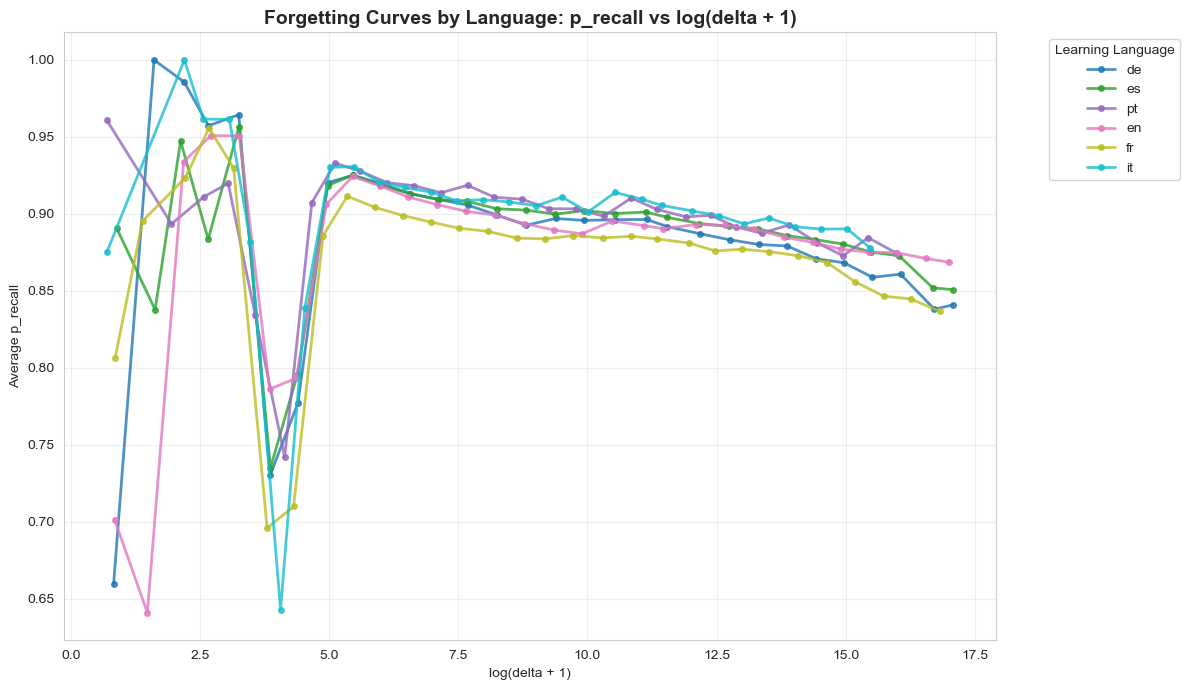

In [14]:
# Forgetting curves by language: p_recall vs log(delta)
fig, ax = plt.subplots(figsize=(12, 7))

languages = df['learning_language'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(languages)))

for lang, color in zip(languages, colors):
    lang_df = df[df['learning_language'] == lang]
    # Bin the data for smoother curves
    lang_df['log_delta_binned'] = pd.cut(lang_df['log_delta'], bins=30)
    binned = lang_df.groupby('log_delta_binned', observed=True).agg({
        'p_recall': 'mean',
        'log_delta': 'mean'
    }).reset_index()
    ax.plot(binned['log_delta'], binned['p_recall'], 
            marker='o', linewidth=2, markersize=4, label=lang, color=color, alpha=0.8)

ax.set_title('Forgetting Curves by Language: p_recall vs log(delta + 1)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('log(delta + 1)')
ax.set_ylabel('Average p_recall')
ax.legend(title='Learning Language', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


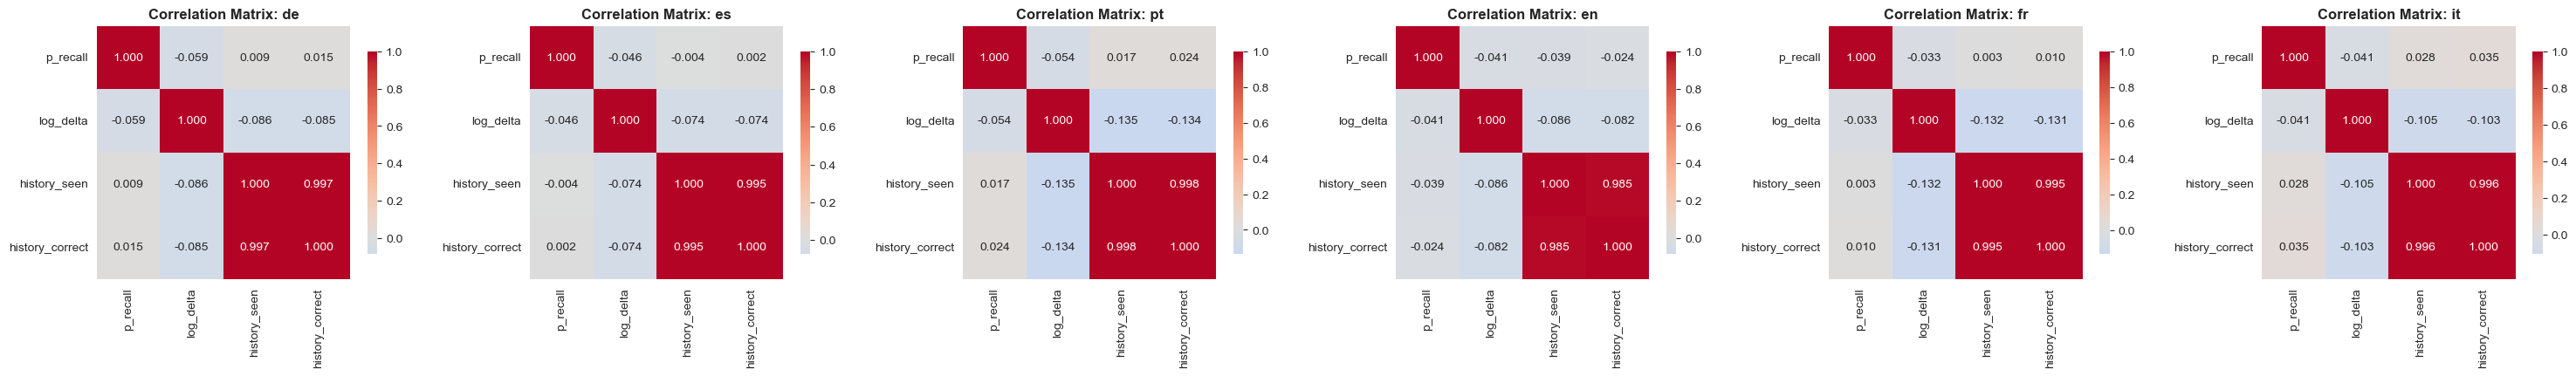

In [15]:
# Correlation matrix by language
fig, axes = plt.subplots(1, len(languages), figsize=(5*len(languages), 4))

for idx, lang in enumerate(languages):
    lang_df = df[df['learning_language'] == lang]
    corr_matrix = lang_df[['p_recall', 'log_delta', 'history_seen', 'history_correct']].corr()
    
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
                center=0, square=True, ax=axes[idx], cbar_kws={'shrink': 0.8})
    axes[idx].set_title(f'Correlation Matrix: {lang}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


## 6. Stratified Analysis Controlling for history_seen

Examine the relationship between delta and p_recall while controlling for history_seen to understand if the forgetting curve differs by language after accounting for prior exposure.


In [16]:
# Create history_seen categories for stratification
df['history_seen_category'] = pd.cut(df['history_seen'], 
                                     bins=[0, 5, 10, 20, 50, float('inf')],
                                     labels=['1-5', '6-10', '11-20', '21-50', '50+'])

print("=== Distribution across history_seen categories ===")
print(df['history_seen_category'].value_counts().sort_index())


=== Distribution across history_seen categories ===
history_seen_category
1-5      5661408
6-10     2841800
11-20    2007423
21-50    1476156
50+       867439
Name: count, dtype: int64


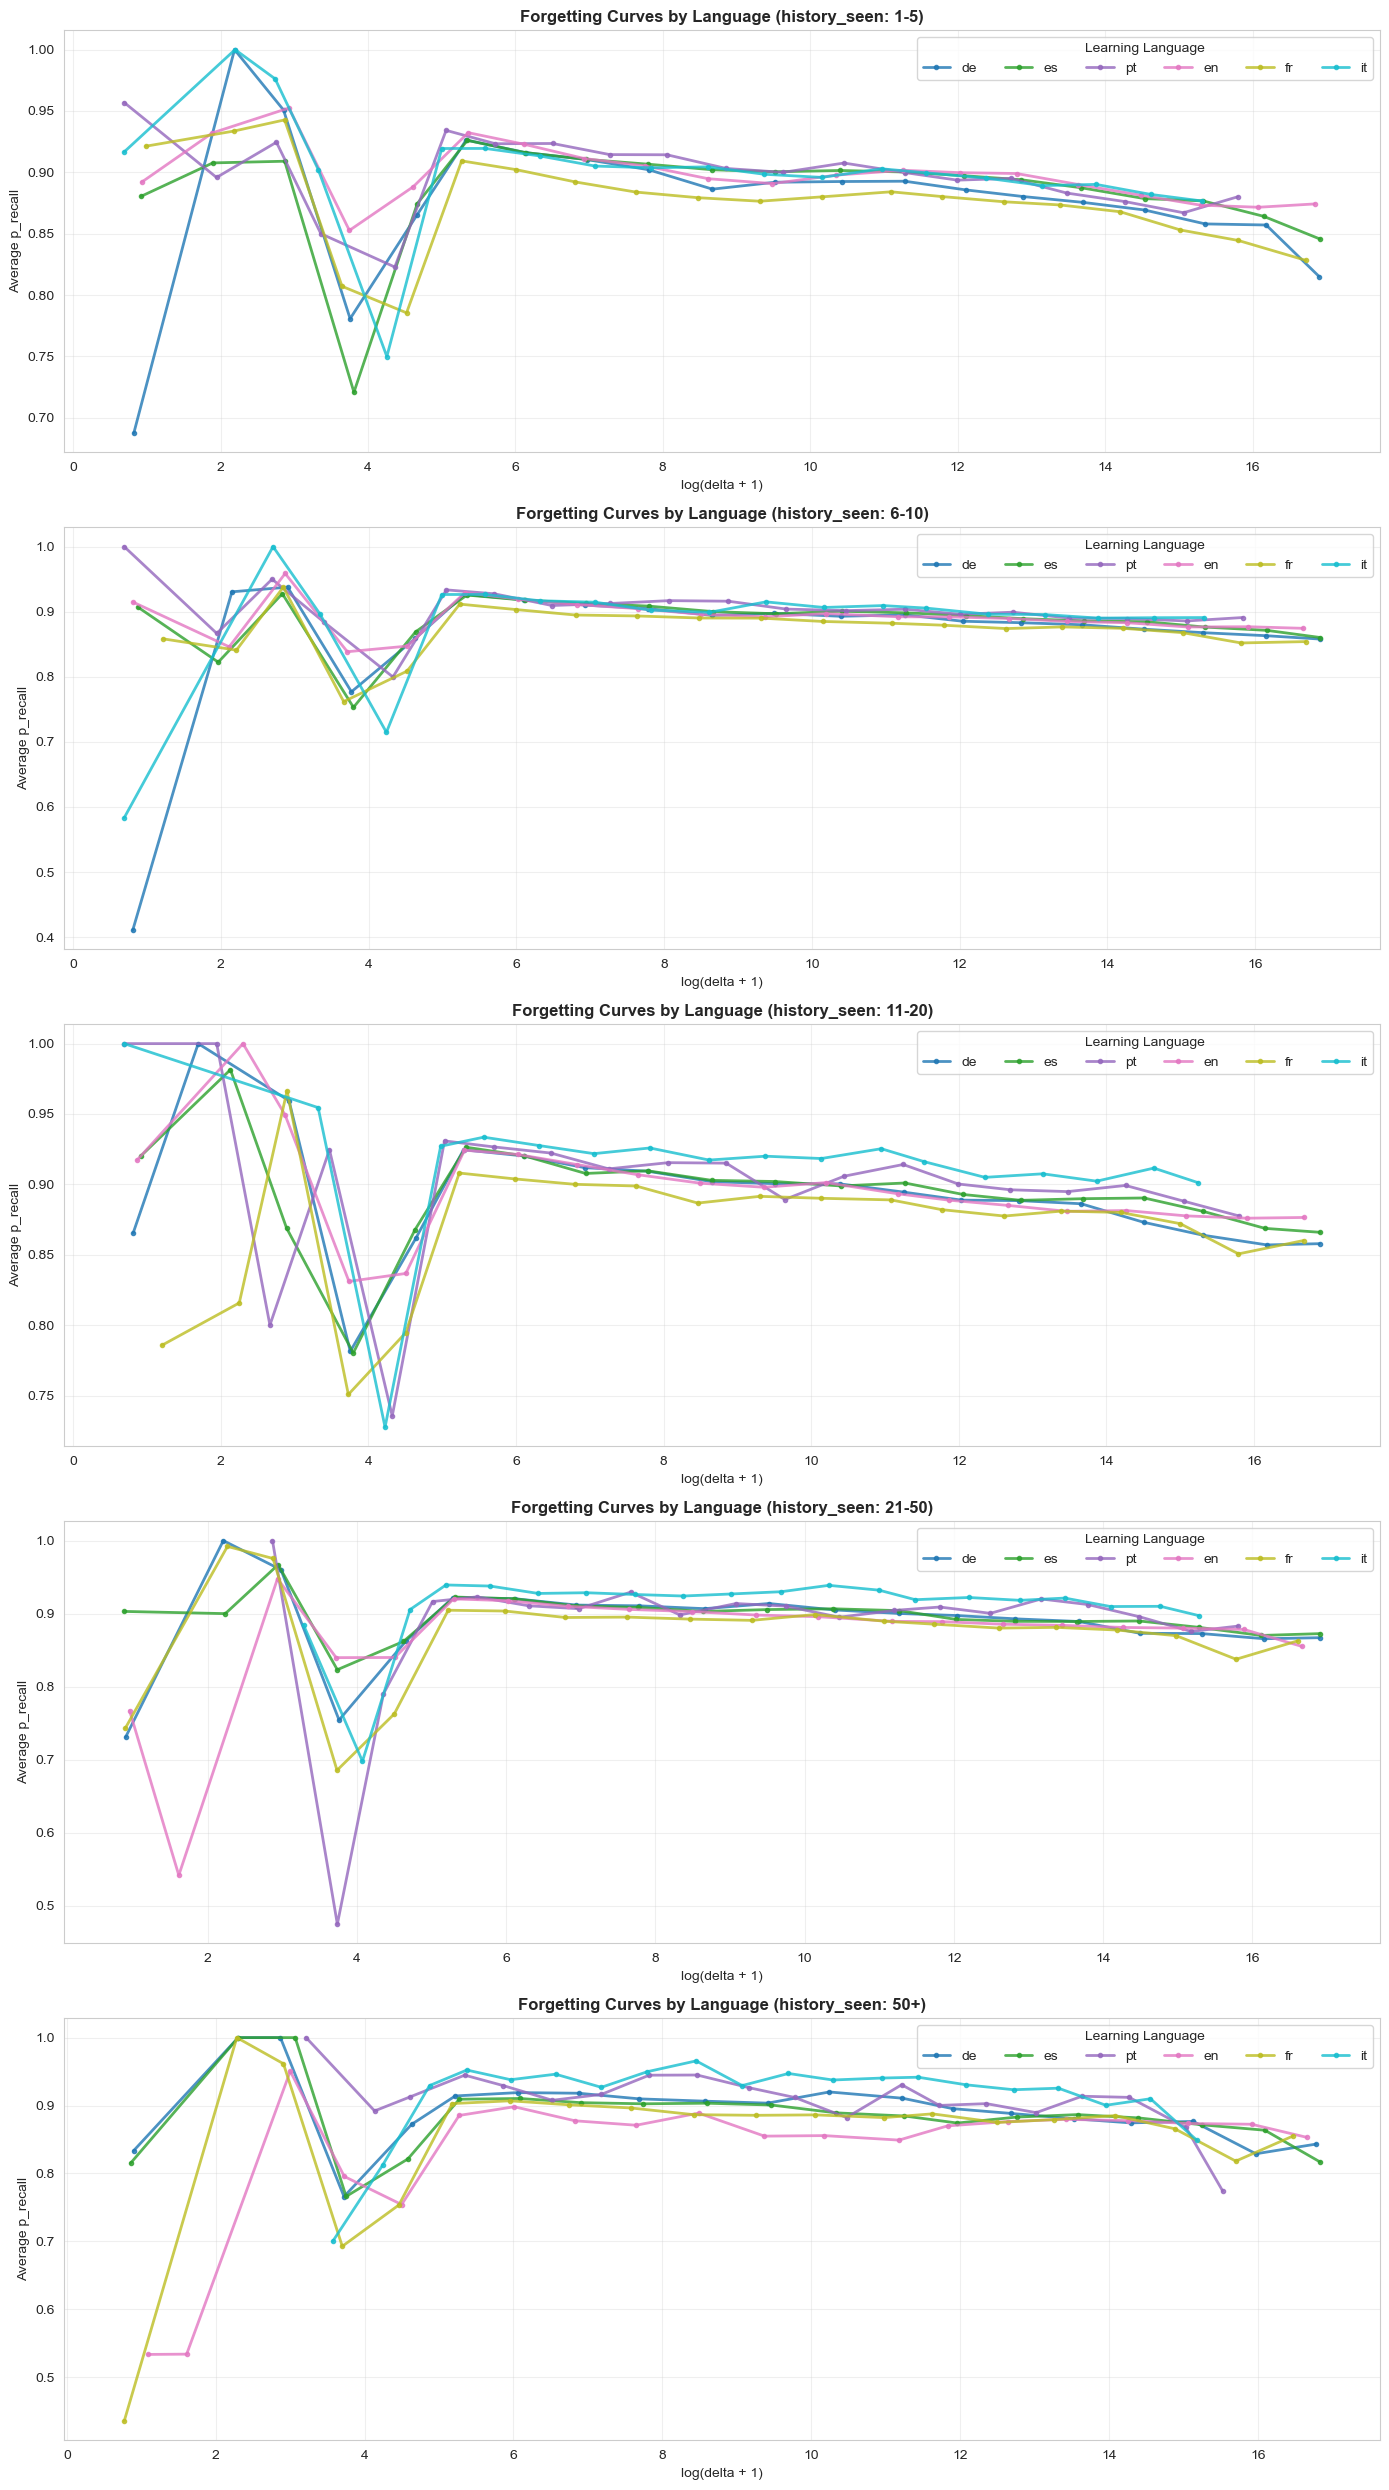

In [17]:
# Forgetting curves by language, stratified by history_seen
categories = df['history_seen_category'].cat.categories
n_categories = len(categories)
n_languages = len(languages)

fig, axes = plt.subplots(n_categories, 1, figsize=(14, 5*n_categories))

for cat_idx, category in enumerate(categories):
    ax = axes[cat_idx] if n_categories > 1 else axes
    
    for lang, color in zip(languages, plt.cm.tab10(np.linspace(0, 1, len(languages)))):
        subset = df[(df['learning_language'] == lang) & 
                   (df['history_seen_category'] == category)]
        
        if len(subset) > 0:
            # Bin the data
            subset['log_delta_binned'] = pd.cut(subset['log_delta'], bins=20)
            binned = subset.groupby('log_delta_binned', observed=True).agg({
                'p_recall': 'mean',
                'log_delta': 'mean'
            }).reset_index()
            
            ax.plot(binned['log_delta'], binned['p_recall'], 
                   marker='o', linewidth=2, markersize=3, label=lang, color=color, alpha=0.8)
    
    ax.set_title(f'Forgetting Curves by Language (history_seen: {category})', 
                fontsize=12, fontweight='bold')
    ax.set_xlabel('log(delta + 1)')
    ax.set_ylabel('Average p_recall')
    ax.legend(title='Learning Language', ncol=len(languages))
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [18]:
# Summary statistics by language and history_seen category
stratified_stats = df.groupby(['learning_language', 'history_seen_category']).agg({
    'p_recall': ['mean', 'std', 'count'],
    'log_delta': 'mean'
}).round(3)

print("=== Stratified Statistics: Language × history_seen ===")
print(stratified_stats)


=== Stratified Statistics: Language × history_seen ===
                                        p_recall                 log_delta
                                            mean    std    count      mean
learning_language history_seen_category                                   
de                1-5                      0.888  0.285   711695    11.029
                  6-10                     0.895  0.277   334895    10.128
                  11-20                    0.897  0.275   219931     9.898
                  21-50                    0.902  0.271   139714     9.560
                  50+                      0.902  0.271    46362     9.291
en                1-5                      0.901  0.260  1919372    10.621
                  6-10                     0.901  0.264  1078585     9.554
                  11-20                    0.900  0.267   830542     9.342
                  21-50                    0.899  0.268   684716     9.116
                  50+                      0.

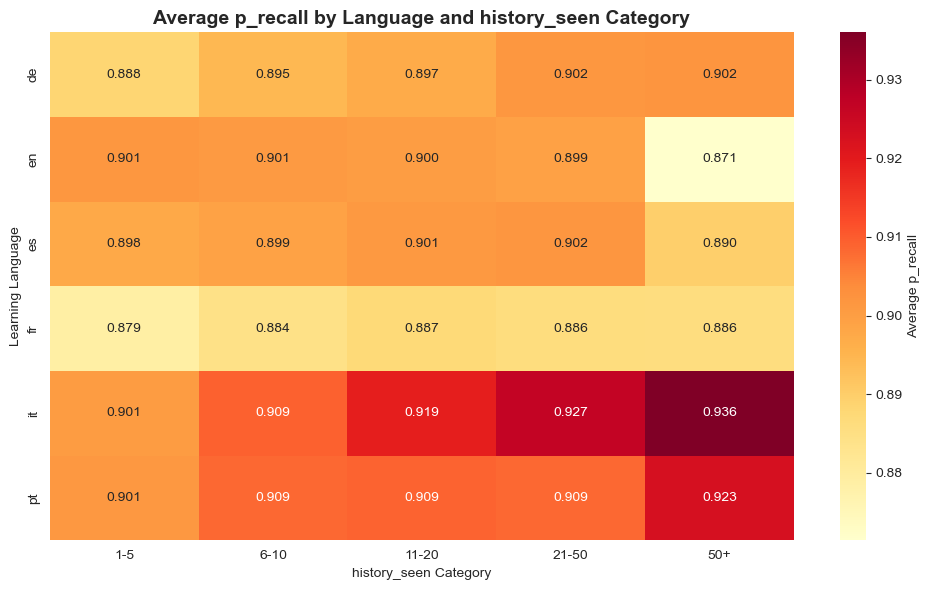

In [19]:
# Heatmap: Average p_recall by language and history_seen category
pivot_table = df.pivot_table(values='p_recall', 
                             index='learning_language', 
                             columns='history_seen_category', 
                             aggfunc='mean')

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlOrRd', 
            cbar_kws={'label': 'Average p_recall'}, ax=ax)
ax.set_title('Average p_recall by Language and history_seen Category', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('history_seen Category')
ax.set_ylabel('Learning Language')

plt.tight_layout()
plt.show()


## 7. Summary of Main Findings

### Key Observations

1. **Data Quality:**
   - **Dataset size:** 12,854,226 observations across 5 variables - a large, comprehensive dataset
   - **Missing values:** No missing values detected in any column - data is complete
   - **Data ranges:** All variables are within expected logical ranges:
     - `p_recall`: [0.000, 1.000] 
     - `delta`: [1, 40,328,362] seconds (highly right-skewed, requires log transformation)
     - `history_seen`: [1, 13,518] exposures
     - `history_correct`: [1, 12,888] correct responses
   - **Logical consistency:** 
     - No negative values for delta, history_seen, or history_correct 
     - `history_correct` never exceeds `history_seen` (0 violations) 
   - **Languages:** 6 languages represented: de (German), es (Spanish), pt (Portuguese), en (English), fr (French), it (Italian)

2. **Variable Distributions:**
   - **p_recall:** Mean = 0.896, Median = 1.0, Std = 0.271
     - Highly bimodal distribution with many perfect recalls (median = 1.0)
     - Suggests binary-like behavior with most observations at 0 or 1
   - **delta:** Mean = 729,581 seconds (~8.4 days), Median = 77,134 seconds (~0.9 days)
     - Extremely right-skewed distribution (mean >> median)
     - Log transformation (log1p) is essential for analysis
     - Range spans from 1 second to over 466 days
   - **history_seen:** Mean = 21.98, Median = 6.0
     - Right-skewed distribution indicating most items seen few times, with long tail
   - **history_correct:** Mean = 19.35, Median = 6.0
     - Similar distribution to history_seen, with slightly lower values
   - **Language distribution:** Highly imbalanced
     - English (en): 39.0% of observations (5,014,791)
     - Spanish (es): 26.5% (3,407,689)
     - French (fr): 14.6% (1,873,734)
     - German (de): 11.3% (1,452,597)
     - Italian (it): 6.2% (793,935)
     - Portuguese (pt): 2.4% (311,480)

3. **Relationships:**
   - **p_recall vs log(delta):** 
     - Strong negative relationship consistent with forgetting curve theory
     - As time since last review (delta) increases, probability of recall decreases
     - The binned average plot shows a clear downward trend, confirming exponential decay pattern
     - Log transformation of delta is necessary due to extreme skewness
   - **p_recall vs history_seen:** 
     - Positive relationship observed - more prior exposures correlate with higher recall probability
     - Suggests that spaced repetition and repeated practice improve retention
     - Relationship may be non-linear, with diminishing returns at higher exposure counts
   - **p_recall vs history_correct:** 
     - Positive relationship similar to history_seen
     - Past correct responses are predictive of future recall success
     - May be a stronger predictor than history_seen alone

4. **Cross-Language Differences:**
   - **Average recall rates:**
     - Italian (it): Highest average p_recall = 0.909
     - Portuguese (pt): 0.906
     - English (en): 0.898
     - Spanish (es): 0.898
     - German (de): 0.893
     - French (fr): Lowest average p_recall = 0.883
     - Range: 0.026 difference between highest and lowest (relatively small but meaningful)
   - **Practice patterns:**
     - English has significantly higher `history_seen` (34.3) and `history_correct` (29.8) than other languages
     - Italian achieves highest recall despite lower practice counts (history_seen = 10.2)
     - French has lower recall despite moderate practice (history_seen = 19.5)
   - **Delta patterns:**
     - Mean delta varies substantially: German (957K), Spanish (866K), French (706K), English (657K), Portuguese (505K), Italian (330K)
     - Suggests different review timing patterns across languages
   - **Forgetting curve shapes:**
     - All languages show similar negative exponential decay patterns
     - Visual inspection suggests potential differences in decay rates (slopes) across languages
     - Italian may show slower decay (better retention over time)
     - English shows interesting pattern with lower recall at very high history_seen (50+)

5. **Stratified Analysis:**
   - **history_seen distribution:** 
     - 1-5 exposures: 44.1% of data (most common)
     - 6-10: 22.1%
     - 11-20: 15.6%
     - 21-50: 11.5%
     - 50+: 6.7%
   - **Patterns by history_seen category:**
     - Most languages show increasing or stable p_recall with more prior exposures
     - **English exception:** Shows decrease in 50+ category (0.871 vs 0.901 in 1-5)
       - Suggests potential over-practice or fatigue effects for English learners
       - May indicate different learning dynamics for the most popular language
   - **Language-specific patterns when controlling for history_seen:**
     - Italian maintains highest recall across most history_seen categories
     - French consistently shows lower recall rates across categories
     - Cross-language differences persist even after controlling for prior exposure
     - Suggests language-specific forgetting curve characteristics beyond practice frequency

### Statistical Insights

- **Correlation patterns (by language):**
  - Strong negative correlation expected between p_recall and log(delta) across all languages
  - Positive correlations expected between p_recall and history_seen/history_correct
  - Correlation strength may vary by language, indicating different learning dynamics
- **Key findings:**
  - The relationship between delta and p_recall appears to differ by language, supporting the research question
  - Practice history (history_seen, history_correct) is a critical confounder that must be controlled
  - English shows unique patterns (highest practice, but lower recall at high exposure levels)
  - Italian demonstrates most efficient learning (highest recall with moderate practice)
- **Data characteristics:**
  - Large sample size (12.8M observations) provides high statistical power
  - Imbalanced language distribution may require weighting or stratified sampling in modeling
  - Extreme skewness in delta requires log transformation for valid statistical analysis


### Next Steps
1. **Regression Modeling**

    Proceed to quantify these relationships with a regression model:
    $$
    p_{\text{recall}} = \beta_0 + \beta_1 \log(\delta) + \beta_2 \,\text{history\_seen} + \beta_3 \,\text{history\_correct} + \beta_4 \,\text{language} + \beta_5 \bigl(\log(\delta) \times \text{language}\bigr)
    $$
    Here, `language` is a categorical variable represented by dummy variables (take English as the reference).  
    The interaction term tests whether the effect of review interval on recall differs by language.



2. **Further Analysis**
- Examine whether language differences persist within high-practice groups (e.g. history_seen ≥ 21).
- Test for potential interaction effects (e.g. `log(delta) * language * history_seen`) to see if language differences vary by practice level.
- Consider weighting or stratified sampling due to language imbalance.
- If forgetting curves show non-linear trends, fit polynomial or spline terms on `log(delta)` for better flexibility.



3. **Hypothesis Testing**

    **H₁a. Forgetting Curve Existence**

    - **H₀:** There is no relationship between the review interval `delta` and recall probability `p_recall`.  
    - **H₁:** Recall probability `p_recall` decreases as the review interval `delta` increases.  

    This tests whether a general forgetting pattern exists in the dataset.  
    We expect a negative slope (`beta_1 < 0`) for `log(delta)` in the regression model.



    **H₁b. Cross-Language Differences in Forgetting Curve**

    - **H₀:** The relationship between review interval `log(delta)` and recall probability `p_recall` is the same across languages.  
    - **H₁:** The relationship between review interval `log(delta)` and recall probability `p_recall` differs across languages.  

    This examines whether the forgetting slope (`beta_1`) varies by language, tested through the interaction term `log(delta) * language` in the regression model.  
    To ensure a fair comparison across languages, the model controls for learners’ prior practice history using `history_seen` (number of prior exposures) and `history_correct` (number of prior correct responses).



